In [200]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': (18, 12)})

In [3]:
titanic_data = pd.read_csv('test/titanic/train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data.shape

(891, 12)

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
X = pd.get_dummies(X)

In [6]:
X = X.fillna({'Age' :X.Age.median()})

In [7]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [25]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

----
Переобученное дерево

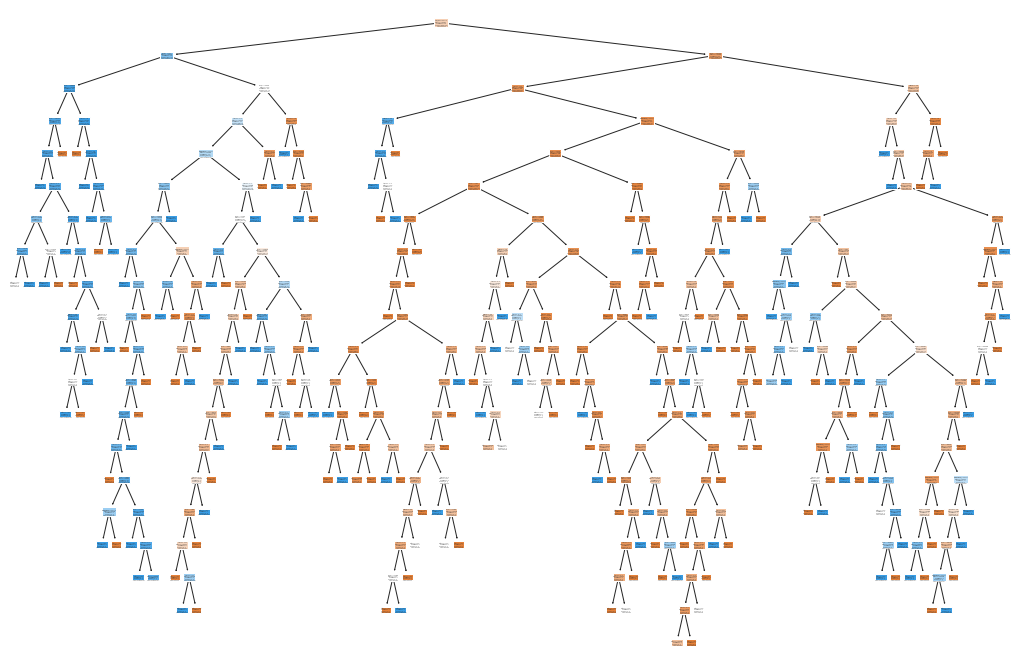

In [30]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

Train / test

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
X_train.shape

(596, 10)

In [82]:
X_test.shape

(295, 10)

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
clf.score(X_test, y_test)

0.7694915254237288

In [43]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [46]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
clf.score(X_test, y_test)

0.8101694915254237

In [67]:
max_depth_values = range(1, 100)

In [68]:
train_val = []
test_val = []
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_val.append(clf.score(X_train, y_train))
    test_val.append(clf.score(X_test, y_test))

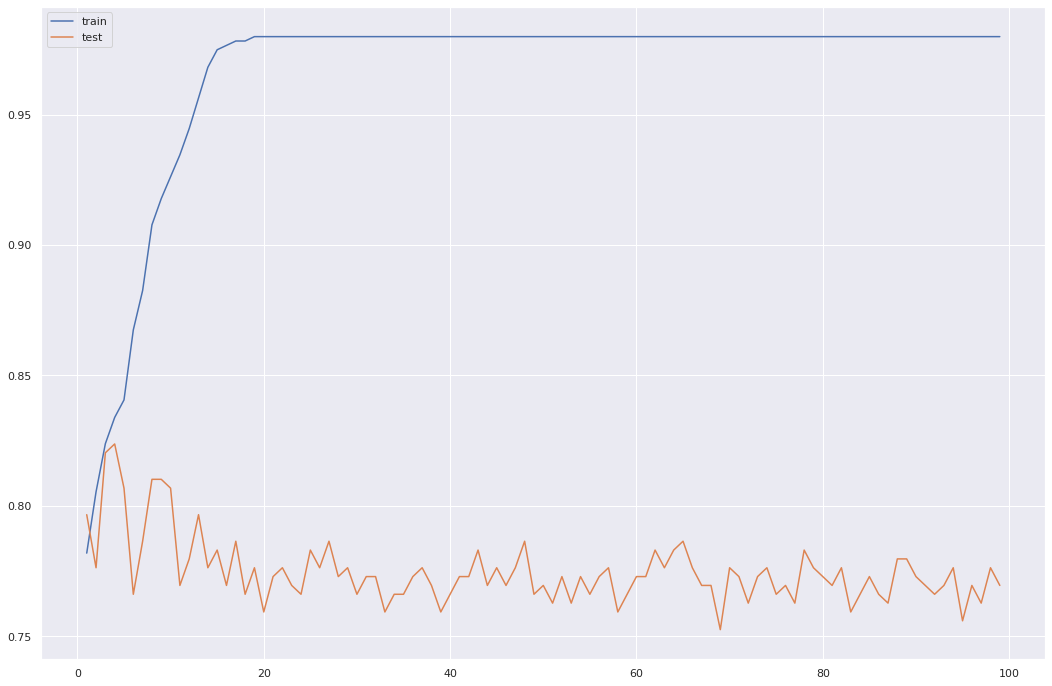

In [72]:
ax = sns.lineplot(x=max_depth_values, y=train_val, label='train')
ax = sns.lineplot(x=max_depth_values, y=test_val, label='test')

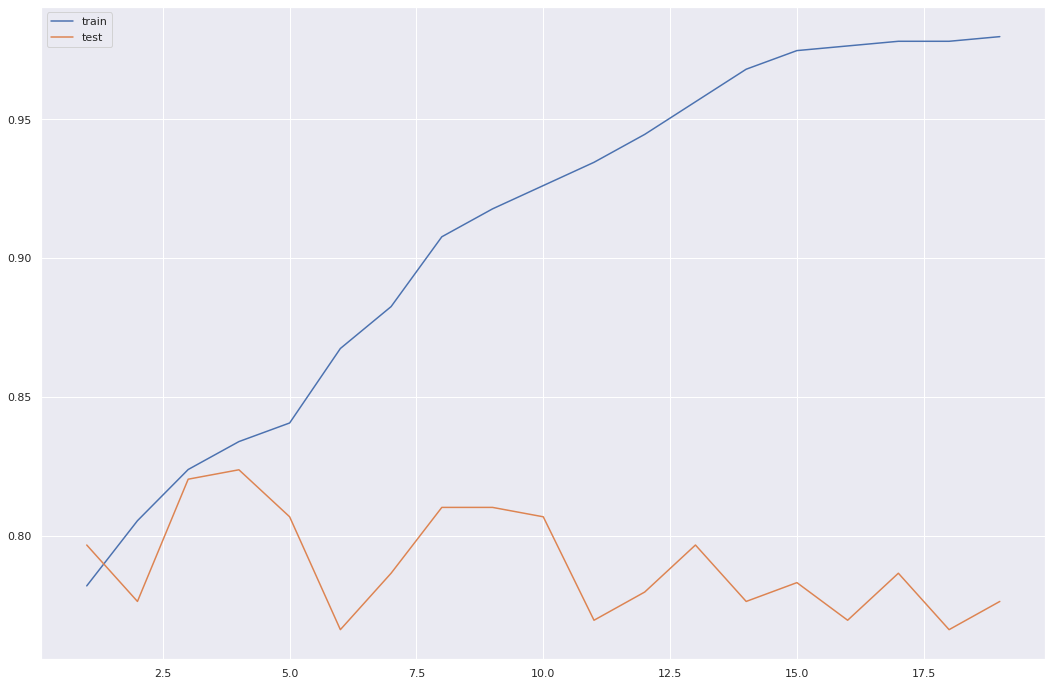

In [74]:
ax = sns.lineplot(x=range(1, 20), y=train_val[0:19], label='train')
ax = sns.lineplot(x=range(1, 20), y=test_val[0:19], label='test')

---
Тесты на глубине 1 (ответ на степике)

In [38]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [39]:
clf2

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [71]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

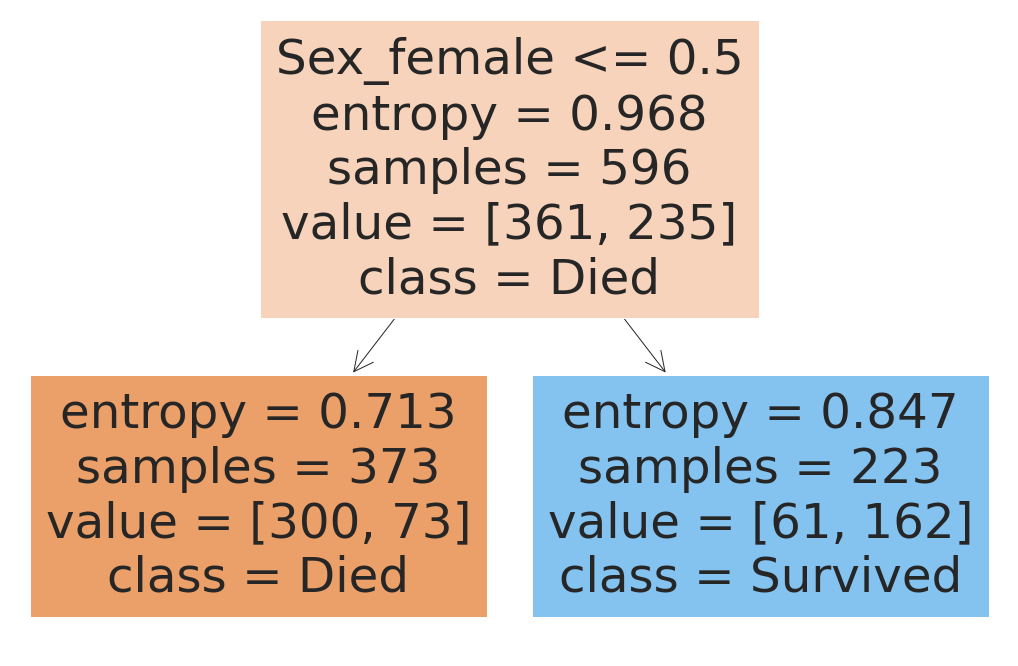

In [72]:
tree.plot_tree(clf2, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [75]:
X_train.Sex_female.sum()/X_train.shape[0]

0.37416107382550334

In [76]:
X_test.Sex_female.sum()/X_test.shape[0]

0.30847457627118646

In [77]:
clf2.score(X_train, y_train)

0.7751677852348994

In [78]:
clf2.score(X_test, y_test)

0.8101694915254237

---
Переобученность внизу

In [85]:
clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [86]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

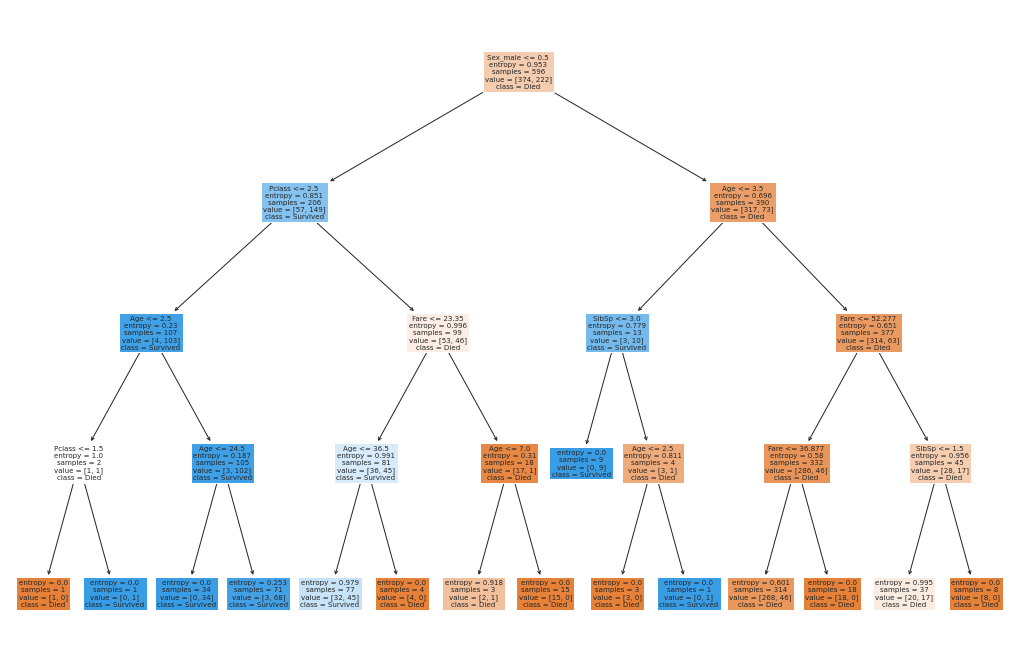

In [87]:
tree.plot_tree(clf3, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

Кросс-валидация

In [91]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [92]:
cross_val_score(clf4, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores_data = scores_data.append({'max_depth': max_depth,
                                      'train_score': train_score,
                                      'test_score': test_score,
                                      'mean_cross_score': mean_cross_score}, ignore_index=True)

In [137]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth',
                           value_vars=['train_score', 'test_score','mean_cross_score'],
                           var_name='set_type', value_name='score')

In [138]:
scores_data_long.head()

,max_depth,set_type,score
0,1.0,train_score,0.781879
1,2.0,train_score,0.805369
2,3.0,train_score,0.823826
3,4.0,train_score,0.833893
4,5.0,train_score,0.840604


In [139]:
scores_data_long.iloc[scores_data_long[scores_data_long.set_type == 'mean_cross_score'].score.idxmax()]

max_depth                12.0
set_type     mean_cross_score
score                0.807101
Name: 209, dtype: object

<AxesSubplot:xlabel='max_depth', ylabel='score'>

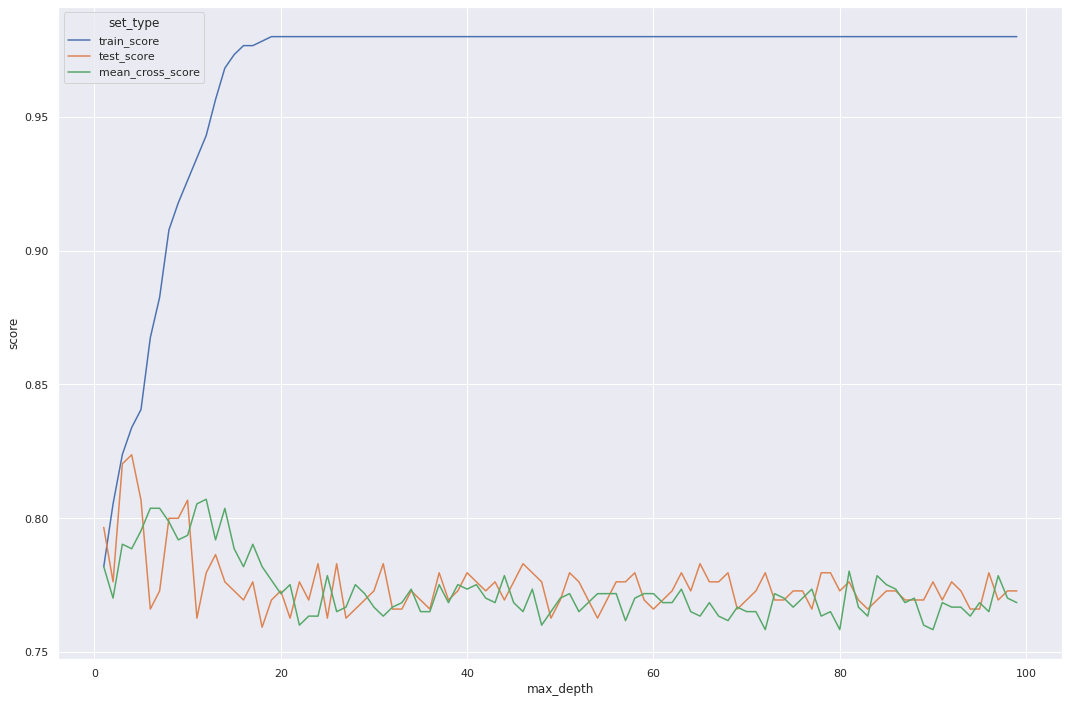

In [140]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [168]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [171]:
best_clf.fit(X_train, y_train)
# cross_val_score(best_clf, X_train, y_train, cv=5).mean()

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [172]:
best_clf.score(X_test, y_test)

0.8033898305084746

---
GridSearchCV

In [173]:
from sklearn.model_selection import GridSearchCV

In [175]:
clf = tree.DecisionTreeClassifier()

In [176]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [177]:
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [178]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [179]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [180]:
best_clf = grid_search_cv_clf.best_estimator_

In [207]:
best_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=10)>

In [182]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [192]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [188]:
y_pred = best_clf.predict(X_test)

In [209]:
precision_score(y_test, y_pred)

0.8297872340425532

In [191]:
recall_score(y_test, y_pred)

0.65

In [193]:
f1_score(y_test, y_pred)

0.7289719626168223

---
Predicted proba

In [211]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [212]:
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

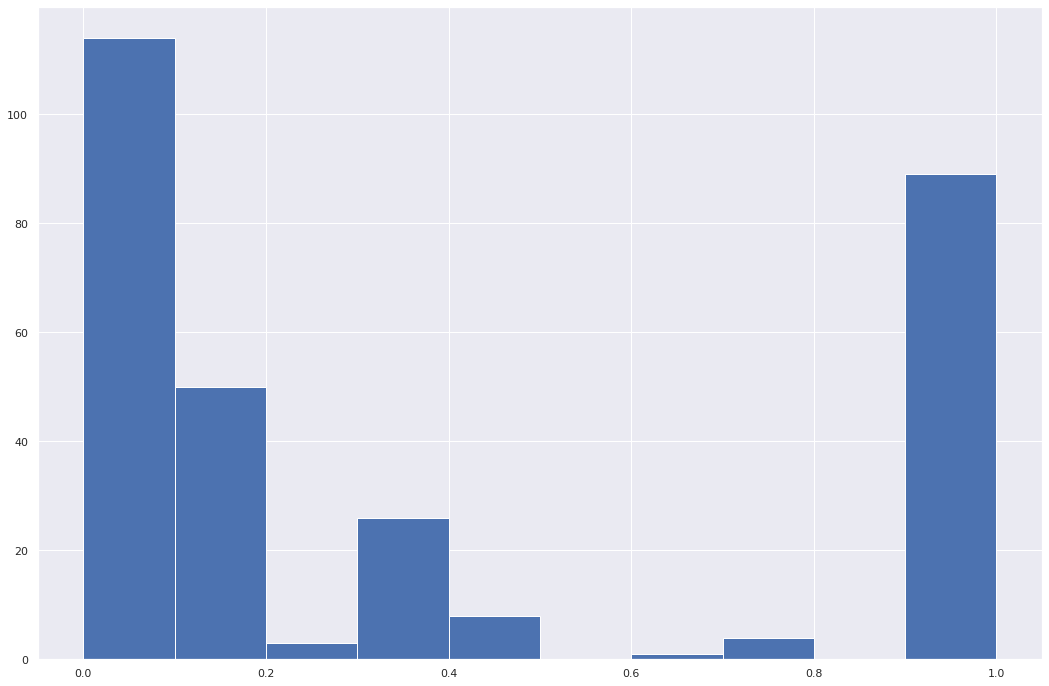

In [213]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [201]:
np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [202]:
best_clf.classes_

array([0, 1])

---
ROC-кривая

In [203]:
from sklearn import metrics

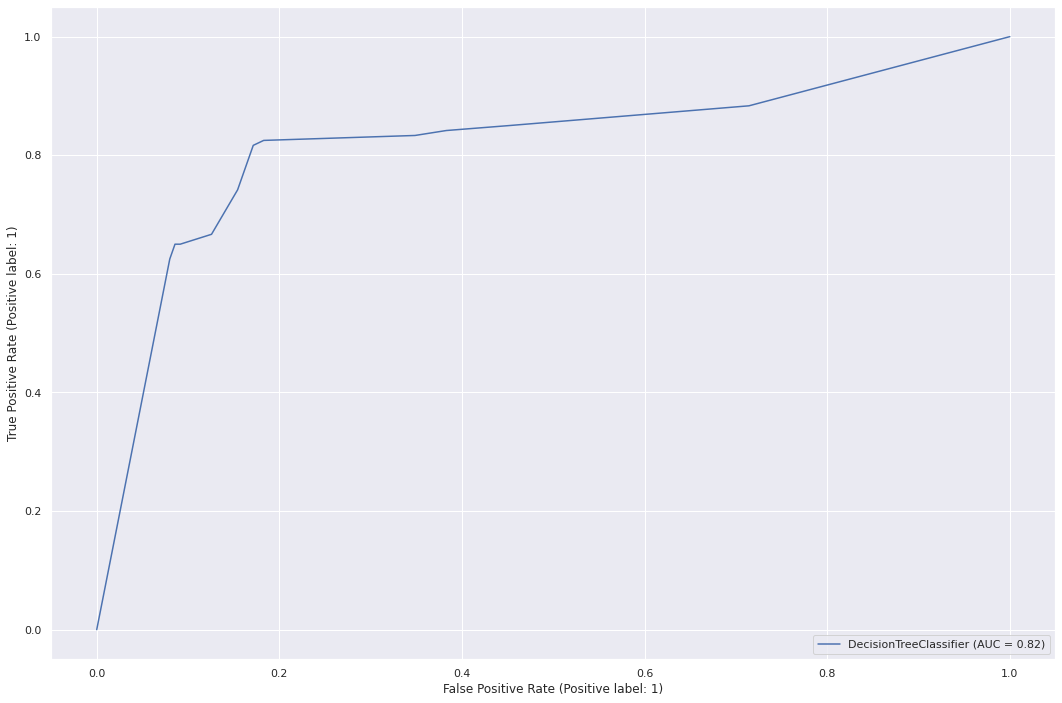

In [204]:
metrics.plot_roc_curve(best_clf, X_test, y_test)

---
Тюним дерево

In [220]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [221]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

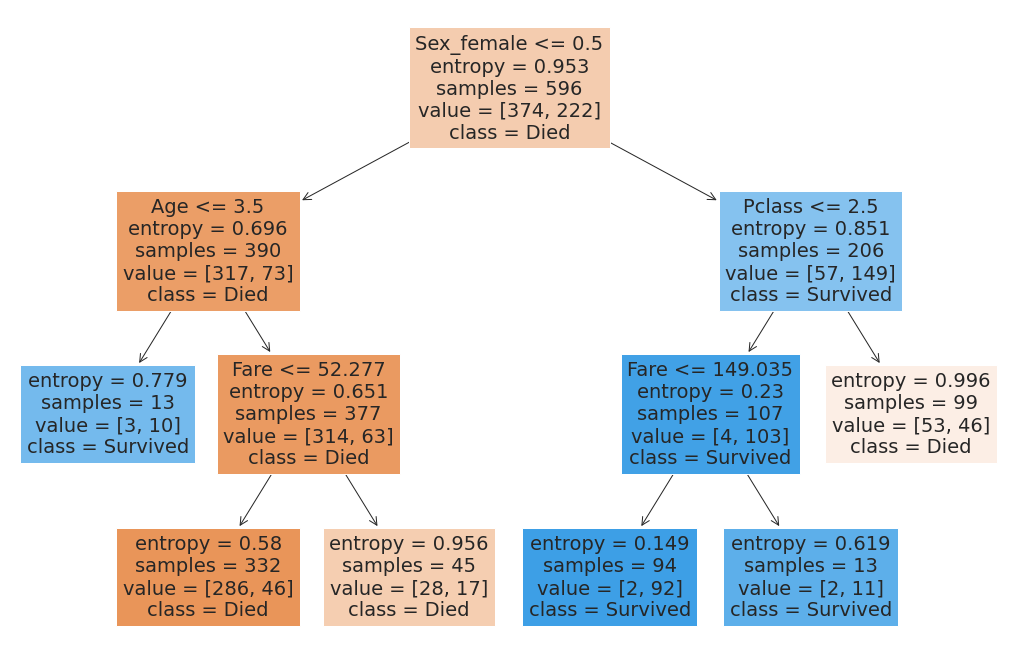

In [222]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

---
Случайный лес

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
clf_rf = RandomForestClassifier()

In [253]:
params = {'n_estimators': range(30, 600, 30), 'max_depth': range(3, 11)}

In [254]:
search = GridSearchCV(clf_rf, params, cv=5)

In [255]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': range(30, 600, 30)})

In [256]:
search.best_params_

{'max_depth': 7, 'n_estimators': 300}

In [257]:
best_clf_rf = search.best_estimator_

In [258]:
y_pred = best_clf_rf.predict(X_test)

In [259]:
metrics.roc_auc_score(y_test, y_pred)

0.7889285714285714

In [260]:
precision_score(y_test, y_pred)

0.826530612244898

In [261]:
recall_score(y_test, y_pred)

0.675

In [262]:
f1_score(y_test, y_pred)

0.743119266055046

In [250]:
pd.DataFrame({'features': list(X_train), 'feature_importances': best_clf_rf.feature_importances_})\
    .sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.231438
4,Fare,0.191051
6,Sex_male,0.173702
1,Age,0.142988
0,Pclass,0.130362
2,SibSp,0.043652
3,Parch,0.041577
7,Embarked_C,0.018123
9,Embarked_S,0.016252
8,Embarked_Q,0.010857


In [1]:
import joblib

In [265]:
joblib.dump(best_clf, 'test/titanic/rf_300.pkl')

['test/titanic/rf_300.pkl']

In [2]:
rf = joblib.load('test/titanic/rf_300.pkl')

In [3]:
rf.feature_importances_

array([0.14165502, 0.20474576, 0.06077507, 0.02480711, 0.23047253,
       0.        , 0.29192025, 0.00706366, 0.00834723, 0.03021337])